## Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
from pyzipcode import ZipCodeDatabase
import matplotlib as plt

## Path Defination and Data Importation

In [2]:

data_path = os.path.join(os.getcwd(), "data")
Filtered_data_path = os.path.join(data_path,"Filtered_data")
Raw_data_path = os.path.join(data_path, 'Raw_data')

# Importing Raw Data
# pop_path = os.path.join(Raw_data_path, "population_by_zip_2010.csv")
# income_path = os.path.join(Raw_data_path, "kaggle_income.csv")
# div_path = os.path.join(Raw_data_path, "population.csv")

# Importing Filtered DataFrames
Poverty_df = pd.read_csv(os.path.join(Filtered_data_path,'Poverty_df.csv'))
Industry_df = pd.read_csv(os.path.join(Filtered_data_path,'Industry_df.csv'))
Diversity_df = pd.read_csv(os.path.join(Filtered_data_path,'Diversity_df.csv'))
Employment_df = pd.read_csv(os.path.join(Filtered_data_path,'Employment_df.csv'))
Transportation_df = pd.read_csv(os.path.join(Filtered_data_path,'Transportation_df.csv'))
Employment_ratio_df = pd.read_csv(os.path.join(Filtered_data_path,'Employment_ratio_df.csv'))
Income_per_capita_df = pd.read_csv(os.path.join(Filtered_data_path,'Income_per_capita_df.csv'))

In [15]:
LOCALPATH = os.getcwd()
DATAPATH = os.path.join(LOCALPATH,"data")
FILTERPATH = os.path.join(DATAPATH,"Filtered_data")
FINAL_PATH = os.path.join(FILTERPATH,"final_data.csv")
POP_PATH = os.path.join(FILTERPATH,"City_based_population.csv")
DIV_PATH = os.path.join(FILTERPATH,"Diversity_df.csv")

In [21]:
final_df = pd.read_csv(FINAL_PATH)
del final_df['Unnamed: 0']
final_matrix = final_df[final_df.columns[final_df.columns != 'City']]

In [22]:
final_matrix

,Poverty,Diversity,Employment,Professional,Service,Office,Construction,Production,Drive,Carpool,...,WorkAtHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Income,IncomeErr,IncomePerCap,IncomePerCapErr
0,67.7,5060.57,1593338.16,592,225,1358,1694,95,1694,95,...,864,16,2152,145,95,1993,7,1412,1471,1412
1,60.6,4511.59,3691277.68,16,2584,960,835,288,1714,2106,...,95,2193,1315,1735,1411,638,1337,663,476,663
2,78.4,5403.88,9224854.16,2115,1479,16,1964,835,16,1068,...,1493,747,605,2179,1951,2027,1471,1637,1339,110
3,49.9,4382.25,4057072.00,2394,938,711,2197,377,1951,447,...,1451,2596,1199,1535,699,640,476,1875,1310,1875
4,120.4,5674.52,2804325.04,2433,2325,748,2109,1566,747,1694,...,1749,2537,1583,848,2197,2023,532,1220,532,1637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,82.3,5895.73,308048.00,1603,1571,2556,1209,20,1068,248,...,399,2251,763,747,2552,2377,1567,169,2109,108
2612,70.9,3798.27,2477154.48,1571,1209,576,576,2067,1740,1168,...,711,110,896,1583,748,2117,826,2596,108,150
2613,71.1,5872.85,943400.00,20,20,20,20,1007,298,638,...,2325,463,2198,2152,2384,2384,1113,225,2113,2161
2614,41.9,5766.53,213570.64,92,2556,1571,1571,1571,1868,923,...,1335,326,1836,1669,1566,1353,441,1034,1694,2600


In [23]:
weights = [1]*23

In [25]:
from sklearn.preprocessing import StandardScaler
final_matrix = final_df[final_df.columns[final_df.columns != 'City']]
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(final_matrix)
    
weights = [1]*23
ranking_vector = np.dot(scaled_matrix, weights)
ranking_vector = np.argsort(ranking_vector)

In [5]:
pop_df = pd.read_csv(POP_PATH)
pop_df.head()

,City,population,minimum_age,maximum_age
0,Aaronsburg,8495,0.0,84.0
1,Abbeville,39509,0.0,84.0
2,Abbot,7639,0.0,79.0
3,Abbotsford,7711,0.0,84.0
4,Abbott,7945,5.0,84.0


In [22]:
list_A = list(pop_df['City'].values)

In [64]:
div_df = pd.read_csv(DIV_PATH)
div_df.head()

,City,Hispanic,White,Black,Native,Asian,Pacific
0,Aberdeen,9.6,80.10,1.10,4.0,1.5,0.4
1,Abilene,23.2,65.60,7.20,0.4,1.7,0.0
2,Abingdon,2.7,86.60,7.15,0.1,1.7,0.0
3,Adams Run,4.8,65.10,25.20,0.5,1.7,0.1
4,Addison,1.5,92.75,1.55,2.3,0.4,0.0


In [25]:
list_b = list(div_df['City'].values)

array(['Aberdeen', 9.6, 80.1, 1.1, 4.0, 1.5, 0.4], dtype=object)

In [48]:
div_df

array(['Aiken', 2.3, 51.4, 44.8, 0.3, 0.7, 0.0], dtype=object)

In [72]:
div_data = (div_df[div_df['City'] == 'Aberdeen'])

In [61]:
div_data

0        Aberdeen
1         Abilene
2        Abingdon
3       Adams Run
4         Addison
          ...    
2588        Zalma
2589      Zebulon
2590      Zeigler
2591        Zenda
2592      Zwingle
Name: City, Length: 2593, dtype: object

In [60]:
pop_df.shape

(17404, 4)

([<matplotlib.patches.Wedge at 0x120905610>,
 [Text(1.0448021340943485, 0.34407630053796956, 'Hispanic'),
  Text(-1.0877913816097753, -0.16343166797012237, 'White'),
  Text(1.050359722487441, -0.3267176967599187, 'Black'),
  Text(1.090349974583638, -0.14538546325358606, 'Native')])

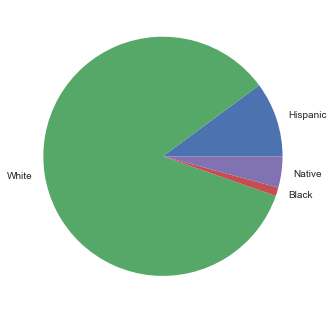

In [80]:
plt.style.use("seaborn")
plt.pie(div_data.values[0][1:5], labels= div_data.columns[1:5])

In [77]:
div_data.columns

Index(['City', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'], dtype='object')